In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data = pd.read_excel('Churn-Modelling Data.xlsx')

# Customer Demographics

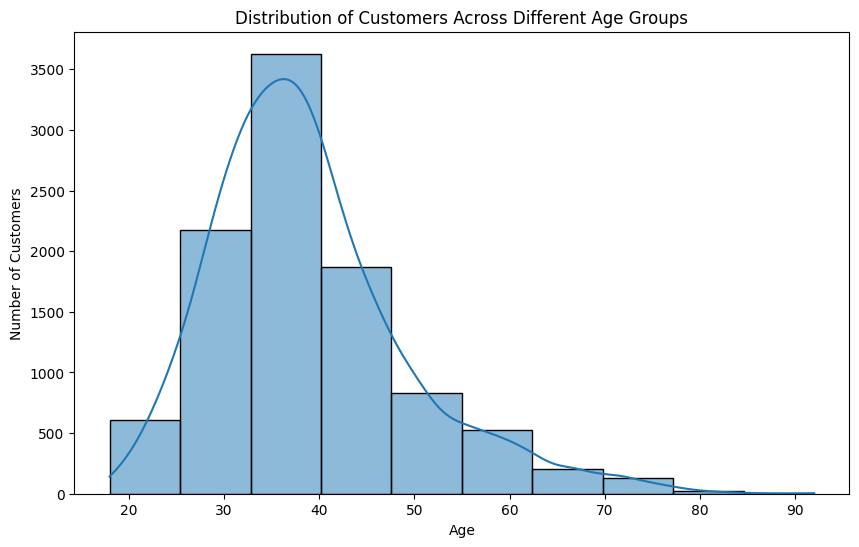

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_data['Age'], bins=10, kde=True)
plt.title('Distribution of Customers Across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

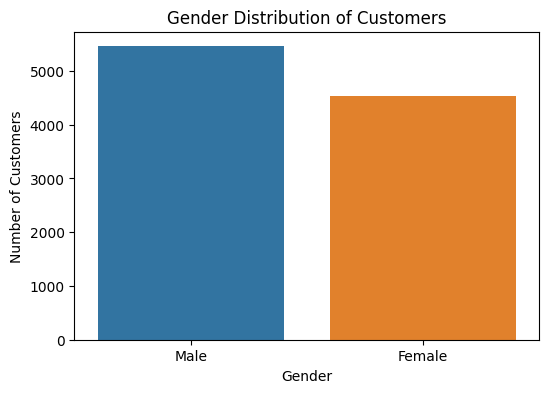

In [4]:
gender_dist = churn_data['Gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_dist.index, y=gender_dist.values)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

# Churn Analysis

In [5]:
churn_rate = churn_data['churned'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 20.37%


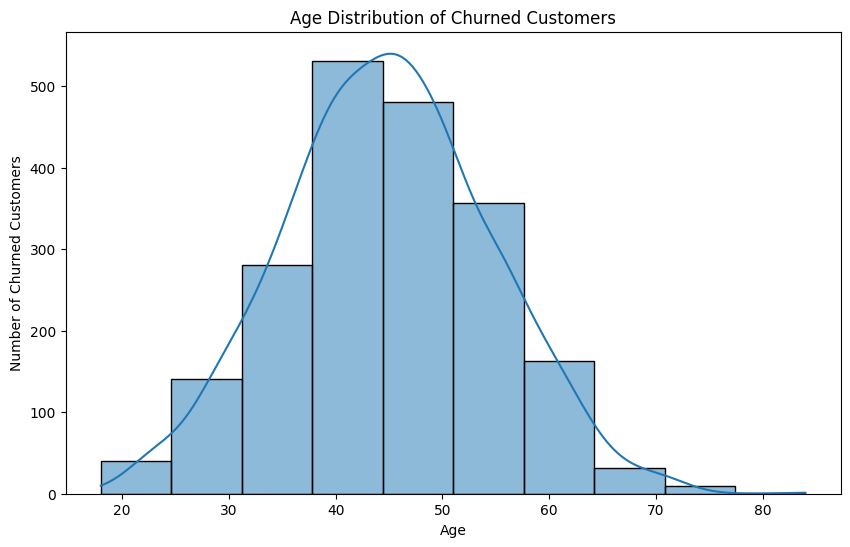

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_data[churn_data['churned'] == 1]['Age'], bins=10, kde=True)
plt.title('Age Distribution of Churned Customers')
plt.xlabel('Age')
plt.ylabel('Number of Churned Customers')
plt.show()

# Product Usage

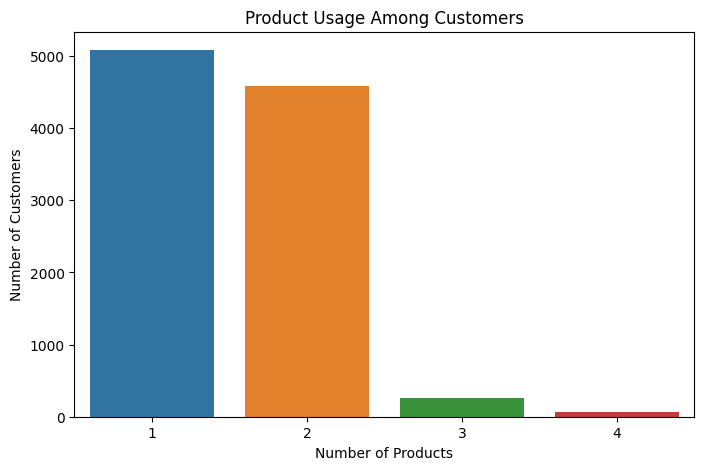

In [7]:
product_usage = churn_data['NumOfProducts'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=product_usage.index, y=product_usage.values)
plt.title('Product Usage Among Customers')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.show()

# Financial Analysis

In [8]:
avg_balance = churn_data['Balance'].mean()
print(f"Average Account Balance: {avg_balance:.2f}")

Average Account Balance: 76485.89


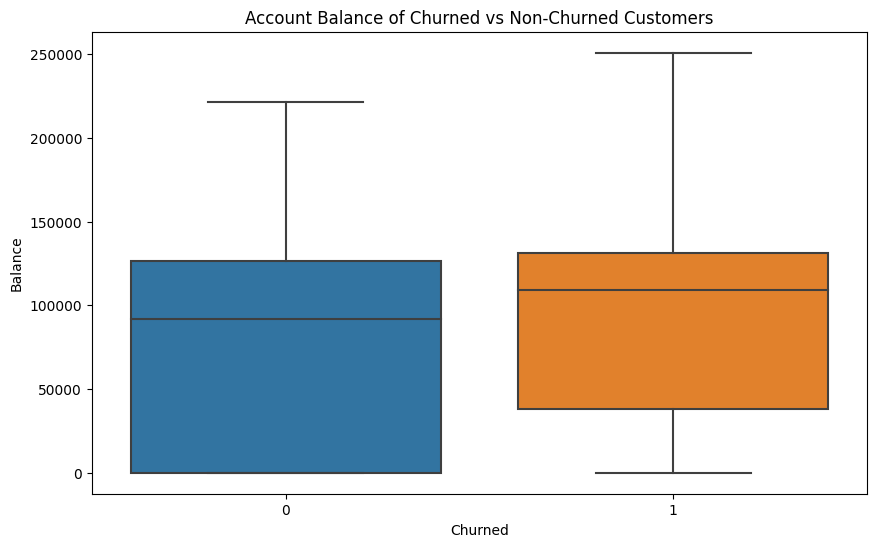

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='Balance', data=churn_data)
plt.title('Account Balance of Churned vs Non-Churned Customers')
plt.xlabel('Churned')
plt.ylabel('Balance')
plt.show()

# Predictive Modeling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [11]:
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'churned'

In [12]:
churn_data = pd.get_dummies(churn_data, columns=['Geography', 'Gender'], drop_first=True)

X = churn_data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'churned'])
y = churn_data['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



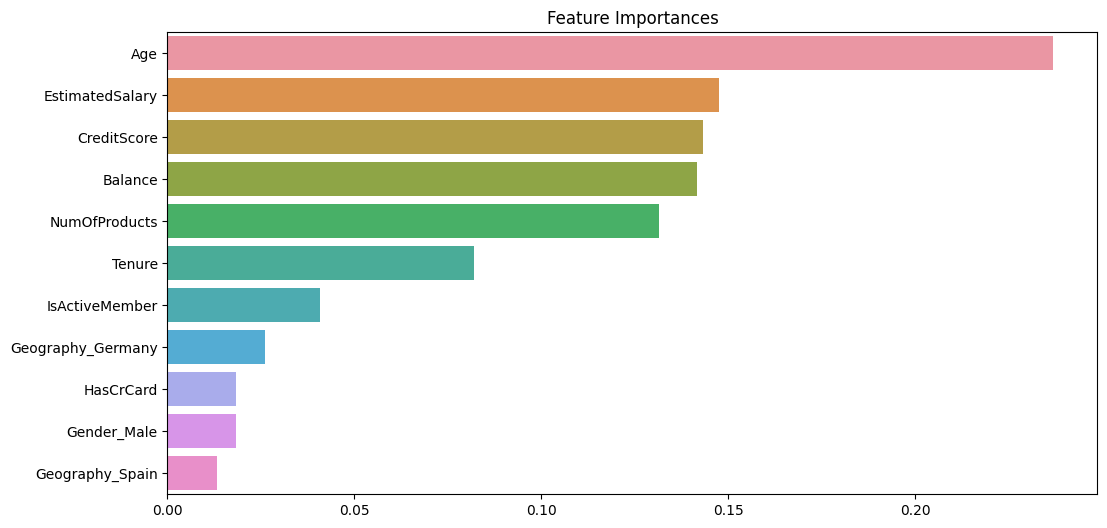

In [14]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()